In [2]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy.stats import multivariate_normal

In [3]:
#Estimate Correspondences

def EstimateCorrespondences(X,Y,t,R, d_max):
    X = np.array(X)
    Y = np.array(Y)
    C = []
    for i in range(len(X)):
            transform = (R.dot(X[i]) + t)
            y = (Y - transform)
            y_norm = np.linalg.norm(y,axis=1)
            min_y = np.argmin(y_norm)
            if (y_norm[min_y] < d_max):
                C.append((i,min_y))
    return np.array(C)

# 2B) ComputeOptimalRegistration
def ComputeOptimalRegistration(X,Y,C):
    X = np.array(X)
    Y = np.array(Y)
    K = len(C)
    tempY = []
    tempX = []

    for i,j in C:
        tempY.append(Y[j])
        tempX.append(X[i])

    x_cent = (np.sum(tempX, axis = 0) / K)
    y_cent = (np.sum(tempY, axis = 0) / K)

    dev_x = tempX - x_cent
    dev_y = tempY - y_cent
                                                                        
    W = (dev_y.T.dot(dev_x)) / K
    U, D, V = np.linalg.svd(W)
    
    R = U.dot(V)
    t = y_cent.T - R.dot(x_cent.T)

    return(t,R)

# 2C)Implement ICP
def ICP(X,Y,t_0,R_0,d_max,num_ICP_iters):
    t = t_0
    R = R_0

    for iter in range(num_ICP_iters):
        C = EstimateCorrespondences(X,Y,t,R,d_max)
        t,R = ComputeOptimalRegistration(X,Y,C)
        
    return(t,R,C)

In [4]:
#2D) Test
X = np.loadtxt("pclX.txt")
Y = np.loadtxt("pclY.txt")

t_0 = np.array([0,0,0])
R_0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
d_max = 0.25
iters = 30
t,R,C = ICP(X,Y,t_0,R_0,d_max,iters)

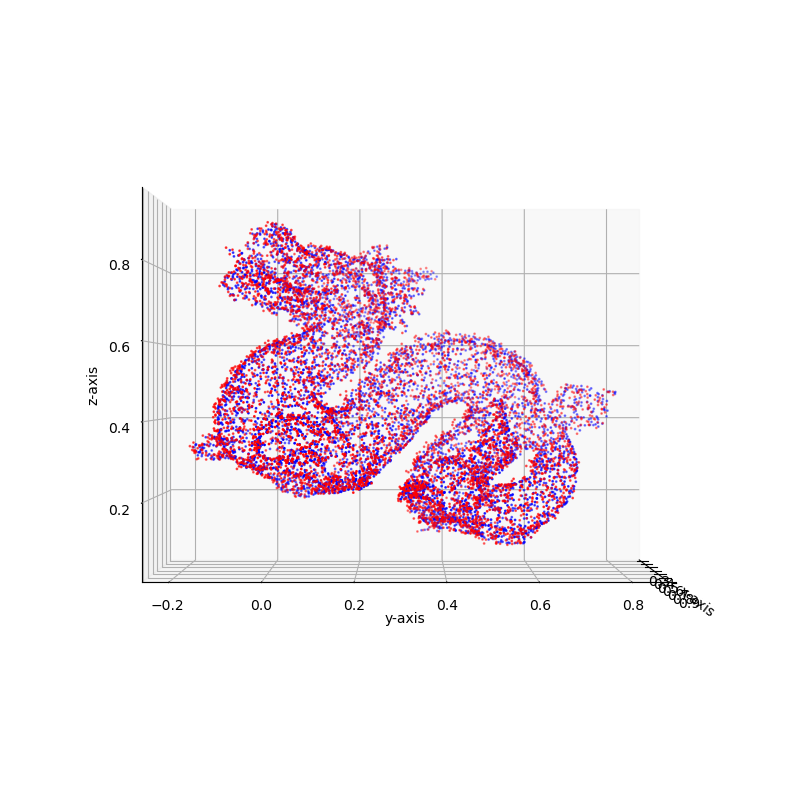

RMSE: 0.008950576587683133
Rotation matrix :
 [[ 0.95126601 -0.15043058 -0.26919069]
 [ 0.22323628  0.9381636   0.26460276]
 [ 0.21274056 -0.31180074  0.92602471]]
translation matrix :  [ 0.49661487 -0.29392971  0.29645004]


In [5]:
#2D) PLotting and RSME
X = np.loadtxt("pclX.txt")
Y = np.loadtxt("pclY.txt")
    
transform = np.zeros((0,3))
for i in range(len(X)):
            tempX = (R.dot(X[i]) + t)
            transform = np.vstack((transform, tempX))

x_pt = pd.DataFrame(X, columns = ['x1','x2','x3'])
x_t = pd.DataFrame(transform, columns = ['x1','x2','x3'])
y_pt = pd.DataFrame(Y, columns = ['y1','y2','y3'])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
#ax.scatter3D(x_pt['x1'], x_pt['x2'], x_pt['x3'], color= "green")
ax.scatter3D(x_t['x1'], x_t['x2'], x_t['x3'], color= "blue", s = 1)
ax.scatter3D(y_pt['y1'], y_pt['y2'], y_pt['y3'], color= "red",s = 1)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.view_init(0,0)
plt.show()

#RMSE
sum = 0
for i,j in C:
    transform = (R.dot(X[i]) + t)
    sum += (np.linalg.norm(Y[j] - transform))**2
RMSE = (sum/len(C))**0.5
RMSE

#2 PART D SUMMARY
print('RMSE:' , RMSE) 
print('Rotation matrix :\n', R)
print('translation matrix : ', t)